#                                                      Partial 1
###                                                                                                                                                       -Purice Crina-Otilia-

### Exercitiul 1. 
 Descrieti un plan pentru constructia unui predictor pentru coloana label

### Pasul 1.
Importam pachetele necesare. Introducem si analizam/vizualizam datele cu care vom lucra.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [2]:
original_data = pd.read_csv('data_train.csv')
original_data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,19268,18,Private,59202,HS-grad,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,11724,37,Federal-gov,194630,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,15729,29,Private,122112,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K
29302,3231,52,?,134447,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,<=50K


### Pasul 2
Verificam daca in datasetul cu care lucram sunt valori nule sau valori incorecte. Observam ca apar 2158 de date care contin valori precum " ?" si le eliminam. Verificam ce coloane contin aceste valori incorecte si apoi stergem ceea ce nu ce convine.

In [3]:
c = (original_data == ' ?').sum(axis=0)
print(c)

C:\Users\Kathe\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Unnamed: 0           0
age                  0
workclass         1650
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1655
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     527
label                0
dtype: int64


In [4]:
original_data=original_data[~original_data['workclass'].isin([" ?"])]
original_data=original_data[~original_data['occupation'].isin([" ?"])]
original_data=original_data[~original_data['native-country'].isin([" ?"])]
original_data

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,13601,24,Private,89154,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
29299,19268,18,Private,59202,HS-grad,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,11724,37,Federal-gov,194630,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,15729,29,Private,122112,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K


### Pasul 3
Am creat new_data , aceasta contine anumite coloane precum : "age", "workclass", "fnlwgt", "education-num", "marital-status", "occupation", "relationship", "race",	"sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "label". Pentru fiecare dintre acestea realizam o histograma astfel incat sa intelegem mai bine ce avem in datele noastre. Desenam numarul de valori pentru fiecare caracteristica de categorie și histograma valorilor pentru fiecare caracteristica continua.

In [5]:
new_data=original_data.loc[:,'age':'label']
new_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,24,Private,89154,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
29299,18,Private,59202,HS-grad,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,37,Federal-gov,194630,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,29,Private,122112,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K


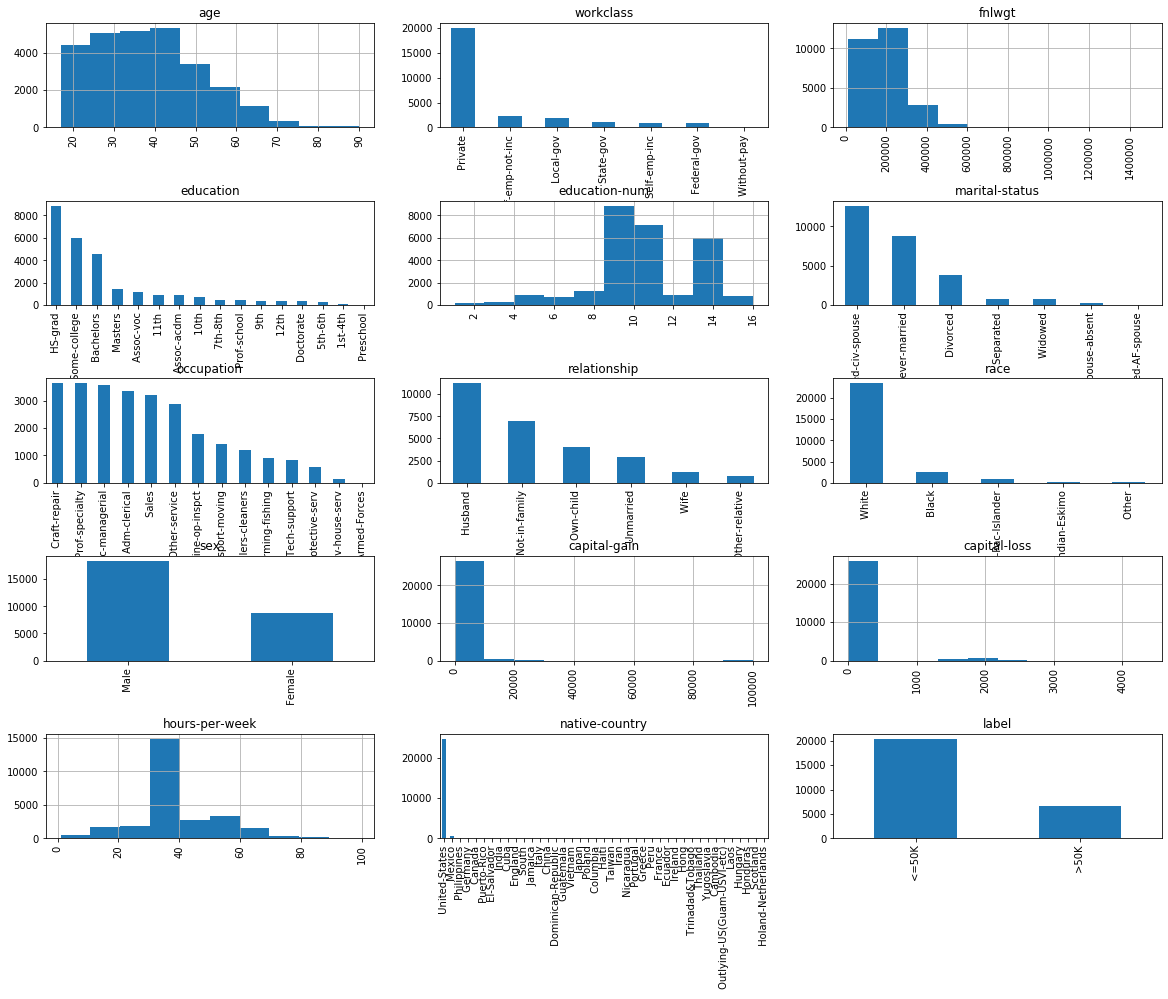

In [6]:
fig = plt.figure(figsize=(20,15))
cols = 3
rows = math.ceil(float(new_data.shape[1]) / cols)
for i, column in enumerate(new_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if new_data.dtypes[column] == np.object:
        new_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        new_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In diagramele de mai sus se observa ca datele noastre sunt concentrate in cea mai mare parte in SUA la persoane albe de sex masculin.

In [7]:
(original_data["native-country"].value_counts() / original_data.shape[0]).head()

 United-States    0.912363
 Mexico           0.020003
 Philippines      0.006189
 Germany          0.004421
 Canada           0.003610
Name: native-country, dtype: float64

### Pasul 4
Folosind coloanele de mai sus realizam o matrice de corelatie pentru a vizualiza daca exista o corelatie liniara intre featurile continue si variabila tinta.

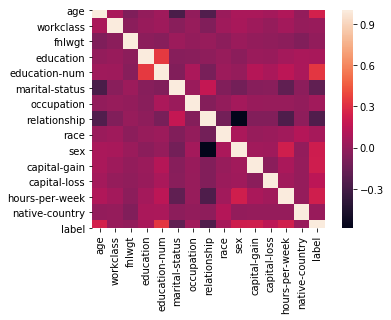

In [8]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
        
encoded_data, _ = number_encode_features(new_data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

Vedem că exista o corelatie ridicata intre education si education-num. Vizualizam cele doua coloane si stergem coloana education deoarece aceasta nu ne furnizeaza nici o informatie in plus.

In [9]:
original_data[["education", "education-num"]].head(15)

,education,education-num
0,Preschool,1
1,HS-grad,9
2,HS-grad,9
3,Some-college,10
4,HS-grad,9
5,Some-college,10
6,HS-grad,9
7,9th,5
8,Some-college,10
9,Some-college,10


In [10]:
del original_data["education"]
new_data=original_data.loc[:,'age':'label']

Vedem că exista o corelatie si intre sex si relationchip. 

In [11]:
original_data[["sex", "relationship"]].head(15)

,sex,relationship
0,Female,Own-child
1,Male,Own-child
2,Male,Not-in-family
3,Male,Husband
4,Male,Husband
5,Male,Husband
6,Female,Not-in-family
7,Male,Husband
8,Male,Not-in-family
9,Female,Own-child


Sar peste Pasul 5 din cadrul planului teoretic deoarece acesta este mai esential pentru partea a doua a partialului. De asemenea acesta poate fi pus si aici dar doresc ca rezolvarea exercitiului doi sa fie cat mai completa asa ca o realizez separat mai jos.

### Pasul 5 
Mai vizualizez datele o data si impart setul de date in doua parti: train_data si test_data.

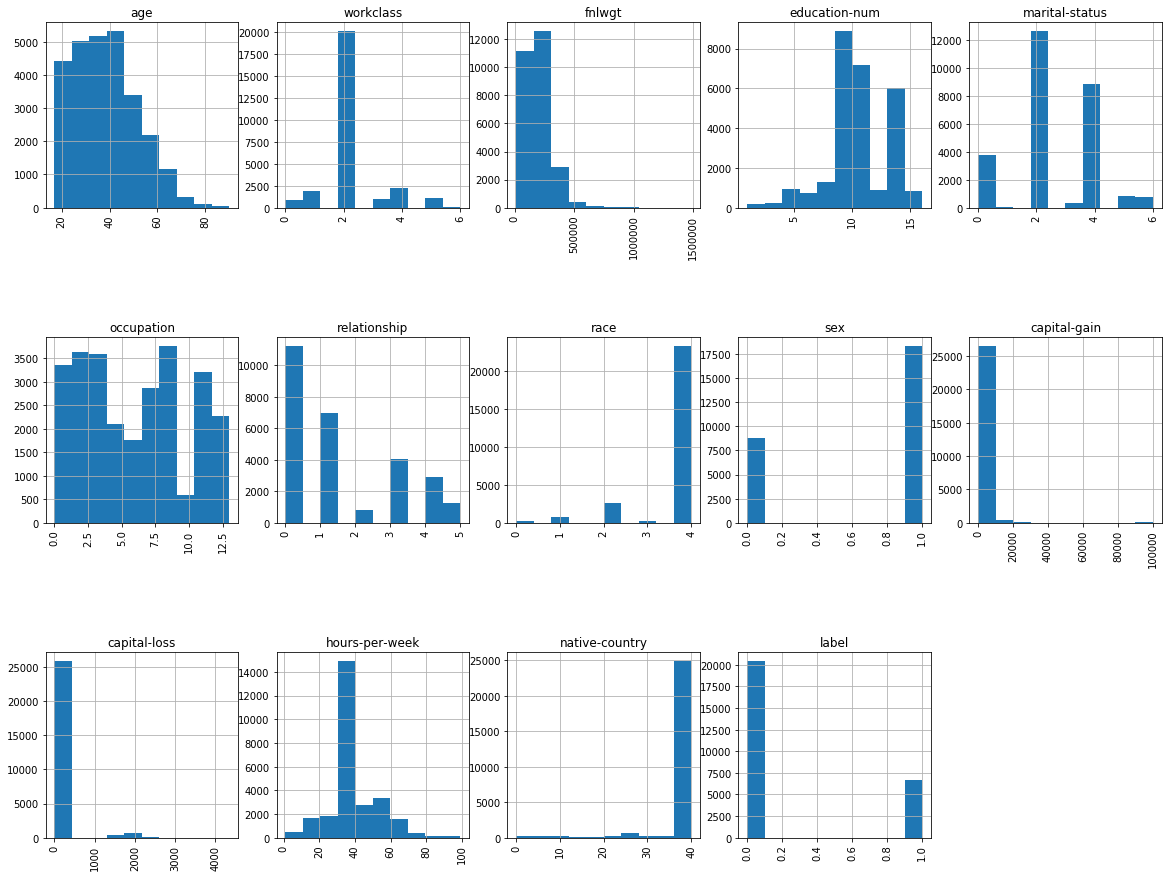

In [12]:
encoded_data, encoders = number_encode_features(new_data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [13]:
temp=original_data.loc[:, 'age':'native-country']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[temp.columns], encoded_data["label"], train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype('f8')), columns=X_train.columns)
X_test = scaler.transform(X_test.astype('f8'))

### Pasul 6
Aplicam mai multi algoritmi pentru a obtine cel mai bun scor si sa alegem modelul potrivit pentru aceasta problema.

Folosim algoritmul Regresia logistica pentru a gasim un model care sa aiba un scor bun pentru gasirea predictiei potrivite.

C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.571677


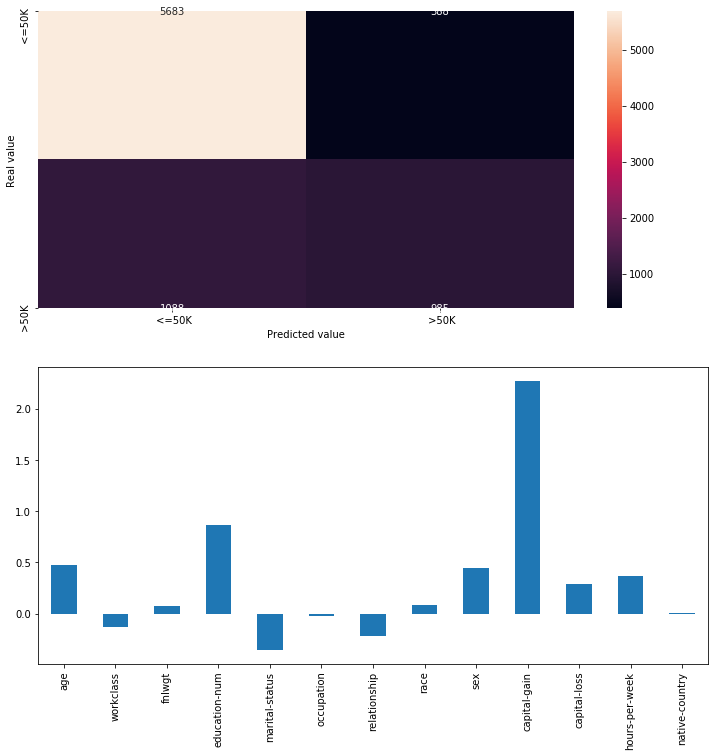

In [14]:

cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["label"].classes_, yticklabels=encoders["label"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

 Incercam sa imbunatatim clasificatorul nostru folosind atribute binare.

In [15]:
original_data

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,13601,24,Private,89154,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
29299,19268,18,Private,59202,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,11724,37,Federal-gov,194630,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,15729,29,Private,122112,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K


In [16]:
binary_data = pd.get_dummies(new_data)
binary_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,label_ <=50K,label_ >50K
0,34,144182,1,0,0,25,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,20,100605,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,26,152457,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,57,353808,10,0,0,60,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,48,122086,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,24,89154,5,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29299,18,59202,9,0,0,10,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
29300,37,194630,14,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
29301,29,122112,13,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


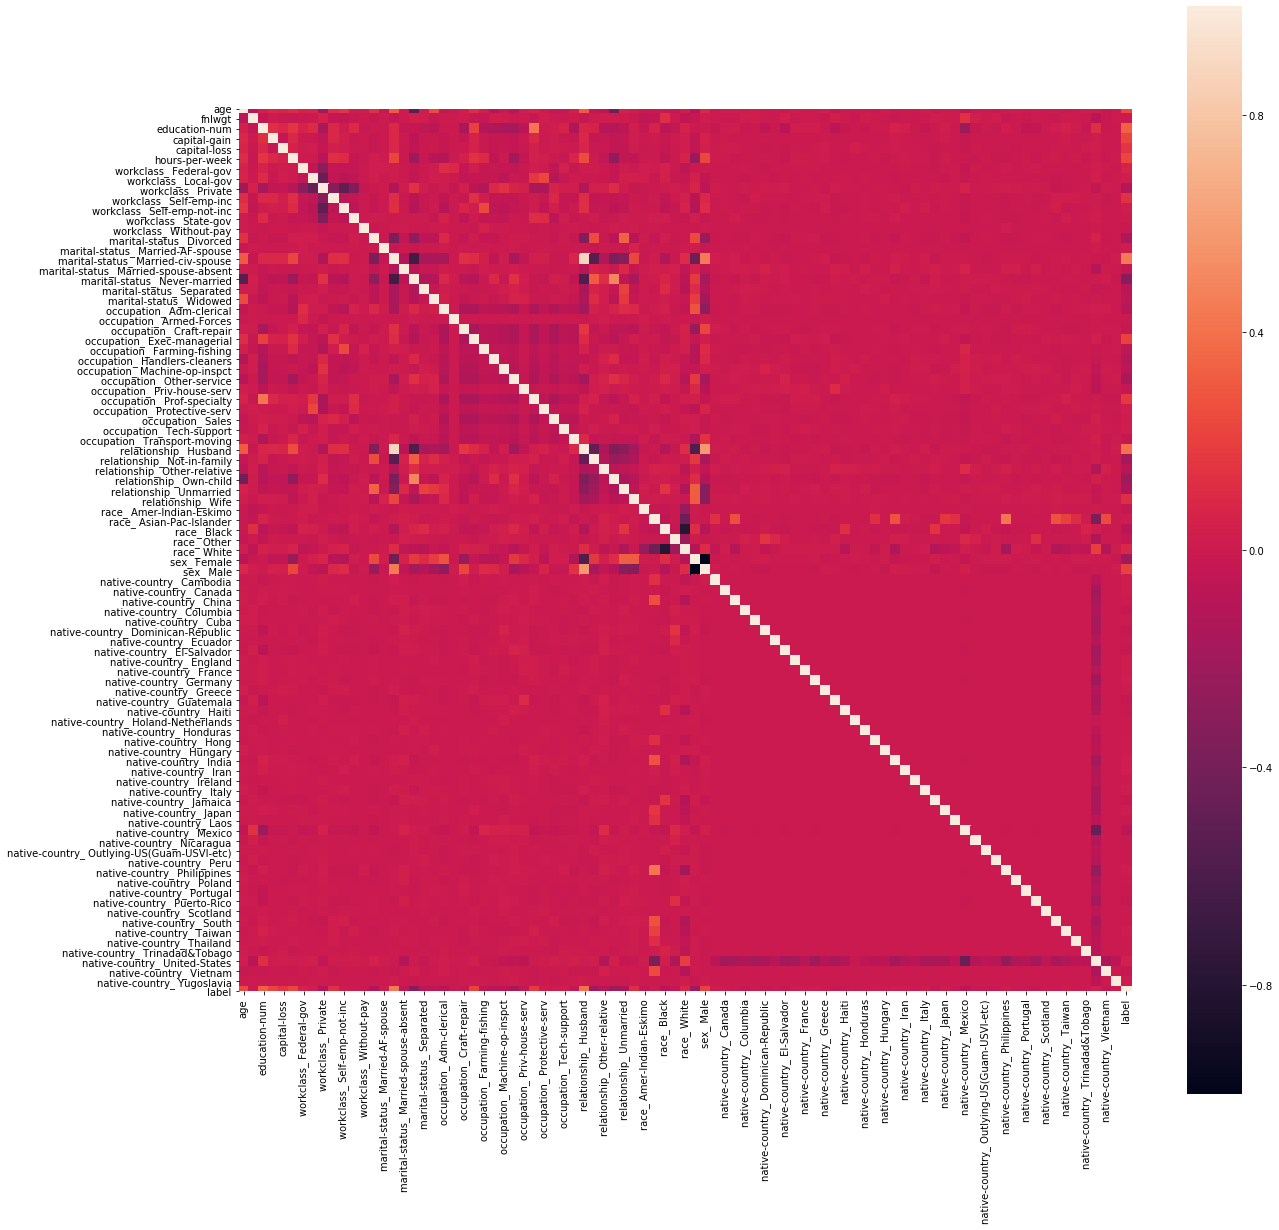

In [17]:

binary_data["label"] = binary_data["label_ >50K"]
del binary_data["label_ <=50K"]
del binary_data["label_ >50K"]
plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()

Testam pentru test_data si vedem rezultatul scorului. Se observa o imbunatatire.

In [18]:
temp=binary_data.loc[:, 'age':'native-country_ Yugoslavia']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_data[temp.columns], binary_data["label"], train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.673134


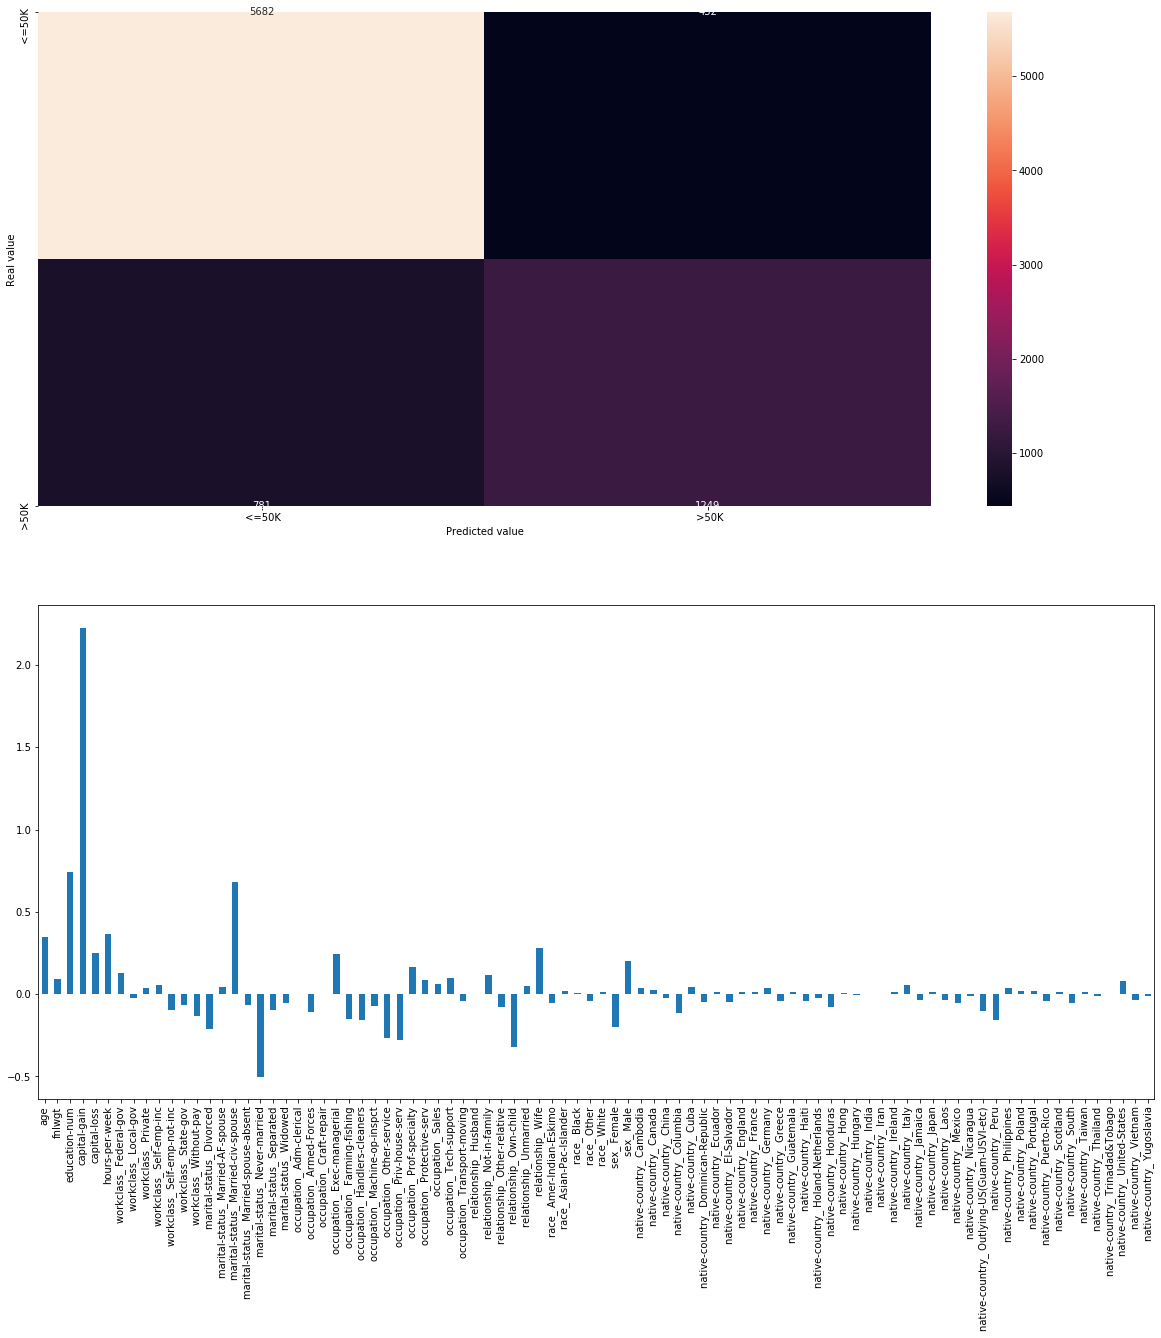

In [19]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["label"].classes_, yticklabels=encoders["label"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print( "F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values( axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

Aplicam alti algoritmi pentru a vedea ce scoruri obtinem 

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score


In [21]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) # fit
y_pred = dtc.predict(X_test)# predict
score = f1_score(y_pred, y_test)# f1 score
print( "F1 score: %f" % skl.metrics.f1_score(y_pred, y_test))

F1 score: 0.624849


In [22]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)# fit
y_pred_2 = gnb.predict(X_test)# predict
score_2 = f1_score(y_pred_2, y_test)# f1 score
print( "F1 score: %f" % skl.metrics.f1_score(y_pred_2, y_test))

F1 score: 0.456362


In [23]:
clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring = 'f1')
clf = clf.fit(X_train, y_train.ravel())
Y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print ('Test F1 for Random Forests :', f1)

C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Test F1 for Random Forests : 0.6248486316299345


Observam ca scorul obtinut de ceilalti trei algoritmi este mai mic deca cel obtinut anterior.

In [24]:
original_data

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,13601,24,Private,89154,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
29299,19268,18,Private,59202,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,11724,37,Federal-gov,194630,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,15729,29,Private,122112,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K


In [25]:

def functie(frame):
    test_data= pd.read_csv(frame)
    test_data=test_data[~test_data['workclass'].isin([" ?"])]
    test_data=test_data[~test_data['occupation'].isin([" ?"])]
    test_data=test_data[~test_data['native-country'].isin([" ?"])]
    del test_data["education"]
    binary_data = pd.get_dummies(test_data)
    binary_data["label"] = binary_data["label_ >50K"]
    del binary_data["label_ <=50K"]
    del binary_data["label_ >50K"]
    temp=binary_data.loc[:, 'age':'native-country_ Yugoslavia']
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_data[temp.columns], binary_data["label"], train_size=0.70)
    scaler = preprocessing.StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = scaler.transform(X_test)
    cls = linear_model.LogisticRegression()
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    #test_data['prediction']=y_pred
    prev=test_data.loc[:,'age':'native-country']
    X=binary_data.loc[:, 'age':'native-country_ Yugoslavia']
    y=binary_data['label']
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X, y)
    test_data['prediction'] = dtc.predict(temp)
    
    
    return test_data



Aceasta este functia care primeste un dataframe si intoarce tot un dataframe care are in plus o coloana "prediction".

In [27]:
functie('data_train.csv')

C:\Users\Kathe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,prediction
0,27239,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K,0
1,19102,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K,0
2,16791,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,2832,57,Self-emp-not-inc,353808,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
4,8228,48,State-gov,122086,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,13601,24,Private,89154,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K,0
29299,19268,18,Private,59202,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K,0
29300,11724,37,Federal-gov,194630,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K,0
29301,15729,29,Private,122112,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K,0


Predictia a fost realizata intr-o coloana separata si valoarea 1 reprezinta acei oameni care castiga >50K.

test=functie('data_train.csv')
for x in test['prediction']:
    if(x=='1'):
        test['prediction'].replace(x,'>50K')
    else:
        test['prediction'].replace(x,'<50K')
test

Daca dorim sa schimbam valorile 1 cu valorile din label ca sa exprime predictia folosim codul de mai sus.

### Exercitiul 2. 
Pentru acelasi set de date, construiti un plan pentru a oferi o recomandare bazata pe date de crestere a venitului la peste 50k$/year.

### Pasul 1
Folosim rezultatele de mai sus pentru a observa legaturile cu castigul ">50K". Realizam matricea de corelatie si vizualizarea modelului.

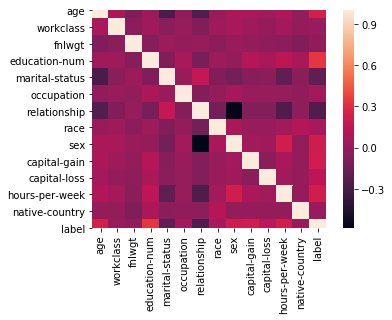

In [35]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
        
encoded_data, _ = number_encode_features(new_data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

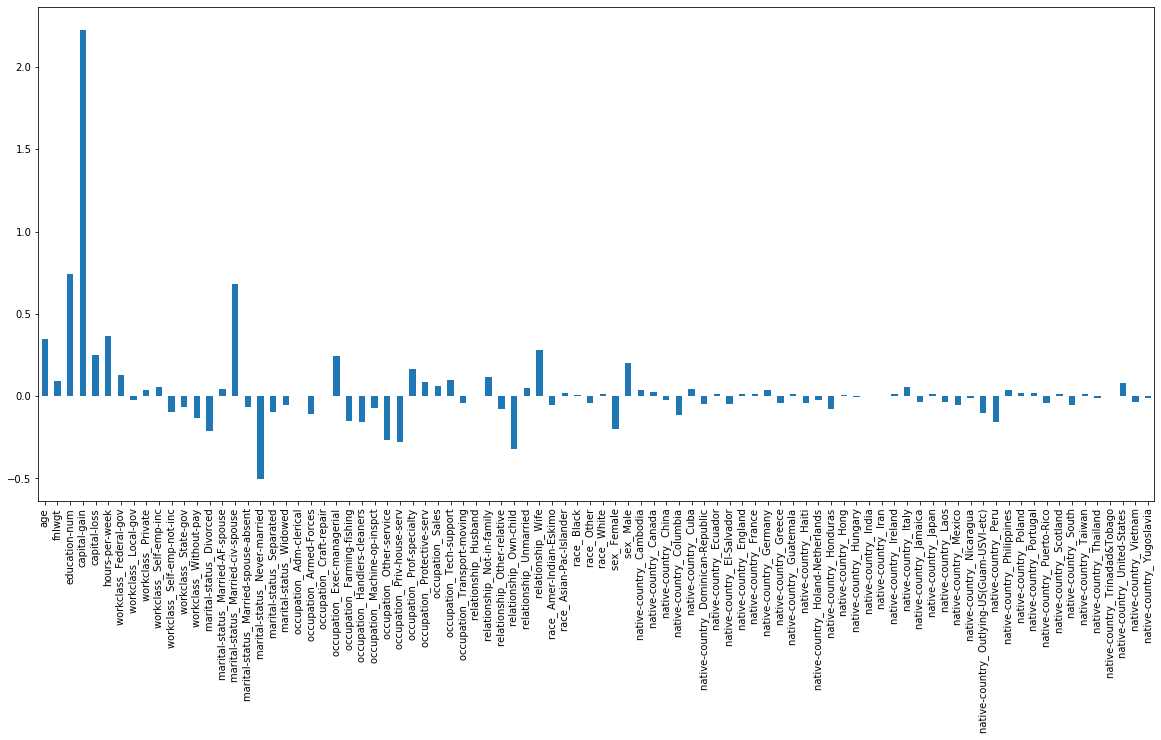

In [37]:
plt.figure(figsize=(20,20))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values( axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

### Concluzia pentru exercitiul 2

Din cele doua de mai sus se observa ca : caracteristicile care influențeaza veniturile unei persoane in mod pozitiv sunt "capital-gain", "married-civ-spounce", "age", "hours-per-week" si "exec-managerial",dar caracteristicile care il afecteaza cel mai negativ sunt "never-married", "own-child", "priv-house-serv", "divorsed" si "female".
Deci pentru ca o pesoana sa aiba un castig mai mare sau sa ajunga la castigul ">50K" aceasta trebuie sa fie mai invarsta, sa lucreze mai multe ore pe saptamana, sa fie casatorita sau sa aiba un castig capital crescut. Adica persoana trebuie sa modifice pozitiv caracteristicile enuntate mai sus care influenteaza cel mai mult castigul.